# Setting the path

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/

/content/drive


In [3]:
%cd My\ Drive

/content/drive/My Drive


In [4]:
%cd case\ studies\ 2

/content/drive/My Drive/case studies 2


In [5]:
%cd Final_Face_Dataset/

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [0]:
import os
import shutil

In [7]:
%cd ..

/content/drive/My Drive/case studies 2


In [8]:
%cd Face\ Dataset

/content/drive/My Drive/case studies 2/Face Dataset


In [9]:
%cd Augmented_Images/

/content/drive/My Drive/case studies 2/Face Dataset/Augmented_Images


In [10]:
!ls

fs_height_rotation_horizontal  fs_zoom_horizontal     zca_width_horizontal
fs_shear_horizontal	       zca_height_horizontal  zca_with_rotation
fs_width_rotation_horizontal   zca_shear_horizontal


In [11]:
%cd ..

/content/drive/My Drive/case studies 2/Face Dataset


In [12]:
!ls

'1-Gathering Face Data.ipynb'
'2-Data Pre-Processing.ipynb'
'3-Data Augmentation.ipynb'
'4-Final Data Preprocessing.ipynb'
 Augmented_Images
 final_face_data
 image_path.npy
 lfw
'Moving the data and extracting the pixels.ipynb'
 name.npy
 shortened_image_set.npy
 shortened_name_set.npy


In [13]:
%cd final_face_data/

/content/drive/My Drive/case studies 2/Face Dataset/final_face_data


In [14]:
!ls

haarcascade_eye.xml		     testing.csv
haarcascade_frontalface_default.xml  training.csv


In [0]:
haarface = os.path.join(os.getcwd(), 'haarcascade_frontalface_default.xml')
haareye = os.path.join(os.getcwd(), 'haarcascade_eye.xml')

In [16]:
%cd ..

/content/drive/My Drive/case studies 2/Face Dataset


In [17]:
%cd ..

/content/drive/My Drive/case studies 2


In [18]:
%cd Final_Face_Dataset/

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [19]:
!ls

final_test_data.csv	 testing_set   Untitled0.ipynb
final_training_data.csv  training_set


In [20]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [21]:
shutil.copy(haarface, os.path.join(os.getcwd(), 'haarcascade_frontalface_default.xml'))
shutil.copy(haareye, os.path.join(os.getcwd(), 'haarcascade_eye.xml'))

'/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/haarcascade_eye.xml'

In [0]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import time

In [0]:
pd.set_option('max_colwidth', -1)

In [24]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [25]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [26]:
!ls

final_test_data.csv	 testing_set   Untitled0.ipynb
final_training_data.csv  training_set


In [0]:
training_df = pd.read_csv('final_training_data.csv')
testing_df = pd.read_csv('final_test_data.csv')

In [28]:
training_df.head()

,Unnamed: 0,images,labels,label_count
0,23506,Yoriko_Kawaguchi - _0_1828.jpg,Yoriko_Kawaguchi,252
1,18146,Yoriko_Kawaguchi - _0_731.jpg,Yoriko_Kawaguchi,252
2,18157,Yoriko_Kawaguchi - _0_4306.jpg,Yoriko_Kawaguchi,252
3,18156,Yoriko_Kawaguchi - _0_7914.jpg,Yoriko_Kawaguchi,252
4,18155,Yoriko_Kawaguchi - _0_7951.jpg,Yoriko_Kawaguchi,252


In [29]:
del training_df['Unnamed: 0']
del training_df['label_count']
training_df.head()

,images,labels
0,Yoriko_Kawaguchi - _0_1828.jpg,Yoriko_Kawaguchi
1,Yoriko_Kawaguchi - _0_731.jpg,Yoriko_Kawaguchi
2,Yoriko_Kawaguchi - _0_4306.jpg,Yoriko_Kawaguchi
3,Yoriko_Kawaguchi - _0_7914.jpg,Yoriko_Kawaguchi
4,Yoriko_Kawaguchi - _0_7951.jpg,Yoriko_Kawaguchi


In [30]:
training_df = training_df.sample(frac = 1)
training_df = training_df.reset_index(drop = True)
training_df.head()

,images,labels
0,Saddam_Hussein - _0_1941.jpg,Saddam_Hussein
1,Colin_Powell - _0_2502.jpg,Colin_Powell
2,Tommy_Franks - _0_8107.jpg,Tommy_Franks
3,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos
4,Naomi_Watts - _0_3813.jpg,Naomi_Watts


In [31]:
len(training_df)

42500

# HAAR Cascade warm-up

In [32]:
!ls

final_test_data.csv	 testing_set   Untitled0.ipynb
final_training_data.csv  training_set


In [33]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [0]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [0]:
img = cv2.imread(training_df['images'][0])

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [0]:
face = face_cascade.detectMultiScale(gray, 1.3, 5)

In [39]:
face

array([[ 67,  66, 115, 115]], dtype=int32)

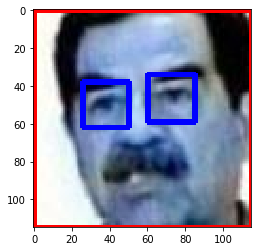

In [40]:
roi = []
for (x, y, w, h) in face:
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_img = img[y:y+h, x:x+w]
  eye = eye_cascade.detectMultiScale(roi_gray)
  for (ex, ey, ew, eh) in eye:
    cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,0,255), 2)
  roi.append(roi_img)
plt.imshow(roi[0])


**Some images have more than 1 face and HAAR Cascade may not detect the correct face. Conducting some more experiments for it.**

# Some more HAAR Cascade Warmups

In [77]:
start = time.time()
roi = []
label = []
for i in range(10):
  img = cv2.imread(training_df['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray, 1.3, 10, minSize=(64,64))
  for (x, y, w, h) in face:
    roi_img = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    eye = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eye:
      cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    roi.append(roi_img)
    label.append(training_df['labels'][i])
end = time.time()
print(end-start)

0.26544713973999023


In [78]:
len(roi)

8

In [79]:
len(label)

8

Text(0.5, 0, 'Saddam_Hussein ')

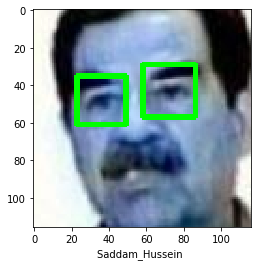

In [80]:

plt.imshow(roi[0])
plt.xlabel(label[0])

Text(0.5, 0, 'Colin_Powell ')

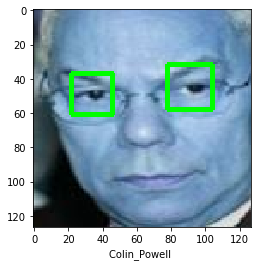

In [81]:
plt.imshow(roi[1])
plt.xlabel(label[1])

Text(0.5, 0, 'Tommy_Franks ')

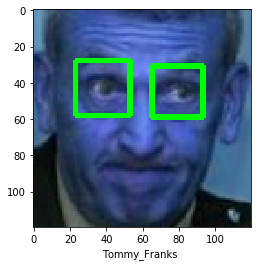

In [82]:
plt.imshow(roi[2])
plt.xlabel(label[2])

Text(0.5, 0, 'Nicanor_Duarte_Frutos ')

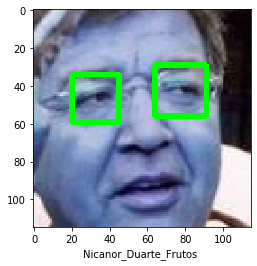

In [83]:
plt.imshow(roi[3])
plt.xlabel(label[3])

Text(0.5, 0, 'Naomi_Watts ')

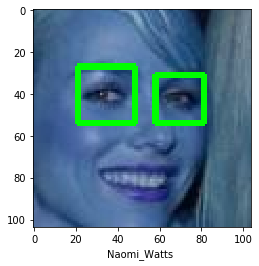

In [84]:
plt.imshow(roi[4])
plt.xlabel(label[4])

Text(0.5, 0, 'Pierce_Brosnan ')

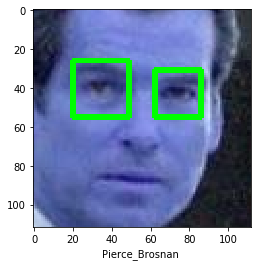

In [85]:
plt.imshow(roi[5])
plt.xlabel(label[5])

In [66]:
training_df.head()

,images,labels
0,Saddam_Hussein - _0_1941.jpg,Saddam_Hussein
1,Colin_Powell - _0_2502.jpg,Colin_Powell
2,Tommy_Franks - _0_8107.jpg,Tommy_Franks
3,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos
4,Naomi_Watts - _0_3813.jpg,Naomi_Watts


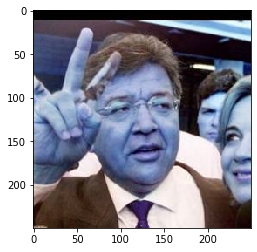

In [76]:
plt.imshow(cv2.imread('Nicanor_Duarte_Frutos - _0_8057.jpg'))

In [0]:
img = cv2.imread('John_Allen_Muhammad - _0_8147.jpg')

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [0]:
roi = []
face = face_cascade.detectMultiScale(gray, 1.3, 7)
for (x, y, w, h) in face:
  roi_img = img[y:y+h, x:x+w]
  roi.append(roi_img)


In [107]:
len(roi)

1

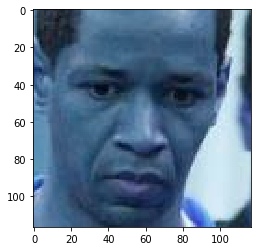

In [108]:
plt.imshow(roi[0])

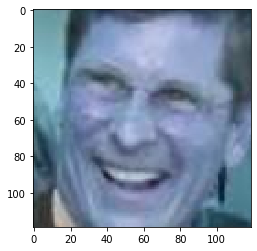

In [119]:
img = cv2.imread('Bill_Simon - _0_2864.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3)
for (x, y, w, h) in face:
  roi_img = img[y:y+h, x:x+w]
  roi.append(roi_img)
plt.imshow(roi[0])

In [120]:
len(roi)

2

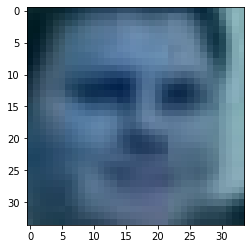

In [121]:
plt.imshow(roi[1])

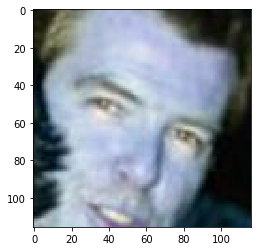

In [122]:
img = cv2.imread('Pierce_Brosnan - _0_4003.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3)
for (x, y, w, h) in face:
  roi_img = img[y:y+h, x:x+w]
  roi.append(roi_img)
plt.imshow(roi[0])

In [123]:
len(roi)

1

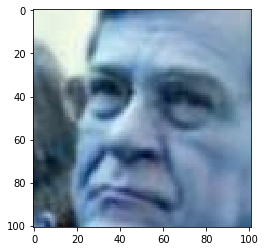

In [124]:
img = cv2.imread('Trent_Lott - _0_7100.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3)
for (x, y, w, h) in face:
  roi_img = img[y:y+h, x:x+w]
  roi.append(roi_img)
plt.imshow(roi[0])

In [125]:
len(roi)

1

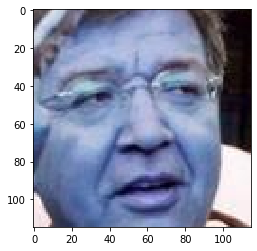

In [132]:

img = cv2.imread('Nicanor_Duarte_Frutos - _0_8057.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3, 8)
for (x, y, w, h) in face:
  roi_img = img[y:y+h, x:x+w]
  roi.append(roi_img)
plt.imshow(roi[0])

In [130]:
len(roi)

2

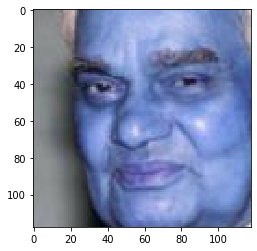

In [140]:

img = cv2.imread('Atal_Bihari_Vajpayee - _0_8337.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3, 5, minSize = (64,64))
for (x, y, w, h) in face:
  roi_img = img[y:y+h, x:x+w]
  roi.append(roi_img)
plt.imshow(roi[0])

In [138]:
len(roi)

1

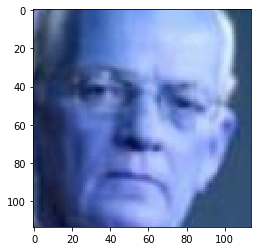

In [142]:

img = cv2.imread('Paul_ONeill - _0_5210.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3, 5, minSize = (64,64))
for (x, y, w, h) in face:
  roi_img = img[y:y+h, x:x+w]
  roi.append(roi_img)
plt.imshow(roi[0])

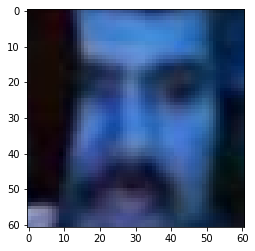

In [144]:

img = cv2.imread('Mohammad_Khatami - _0_7771.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in face:
  roi_img = img[y:y+h, x:x+w]
  roi.append(roi_img)
plt.imshow(roi[0])

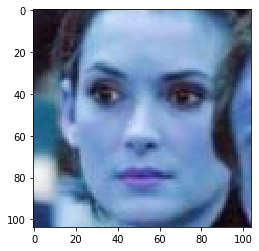

In [146]:

img = cv2.imread('Winona_Ryder - _0_6426.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in face:
  roi_img = img[y:y+h, x:x+w]
  roi.append(roi_img)
plt.imshow(roi[0])

1
2


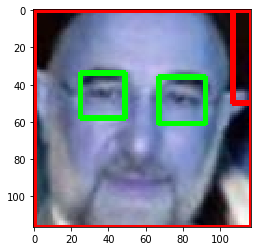

In [162]:

img = cv2.imread('Mohammad_Khatami - _0_7771.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in face:
  cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
  roi_img = img[y:y+h, x:x+w]
  roi_gray = gray[y:y+h, x:x+w]
  eye = eye_cascade.detectMultiScale(roi_gray)
    #eyes.append(eye)
  for (ex, ey, ew, eh) in eye:
    cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
  print(len(eye))
    
  if len(eye)==2:
    roi.append(roi_img)
plt.imshow(roi[0])

0
2


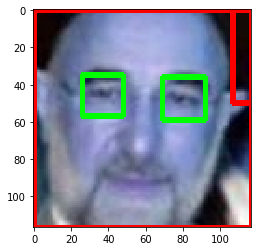

In [219]:

img = cv2.imread('Mohammad_Khatami - _0_7771.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
roi = []
face = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in face:
  cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
  roi_img = img[y:y+h, x:x+w]
  roi_gray = gray[y:y+h, x:x+w]
  eye = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    #eyes.append(eye)
  for (ex, ey, ew, eh) in eye:
    cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
  print(len(eye))
    
  if len(eye)==2:
    roi.append(roi_img)
plt.imshow(roi[0])

**Finally I have settled on the fact that if the cascade detects minimum 2 eyes in a face, I will be considering only that for training purposes.**

# HAAR Features for 1st 500 training images

In [147]:
training_df.head()

,images,labels
0,Saddam_Hussein - _0_1941.jpg,Saddam_Hussein
1,Colin_Powell - _0_2502.jpg,Colin_Powell
2,Tommy_Franks - _0_8107.jpg,Tommy_Franks
3,Nicanor_Duarte_Frutos - _0_8057.jpg,Nicanor_Duarte_Frutos
4,Naomi_Watts - _0_3813.jpg,Naomi_Watts


In [163]:
images = []
labels = []
roi = []
#eyes = []

start = time.time()

for i in range(500):
  img = cv2.imread(training_df['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    eye = eye_cascade.detectMultiScale(roi_gray)
    #eyes.append(eye)
    for (ex, ey, ew, eh) in eye:
      cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    #print(len(eye))
    
    if len(eye)>=1:
      roi.append(roi_img)
      labels.append(training_df['labels'][i])
      images.append(training_df['images'][i])
    
    if len(images)%50 == 0:
      print(len(images))
      print(time.time() - start)





50
16.05864119529724
100
35.02615737915039
150
52.87551403045654
200
68.48311614990234
200
68.91354870796204
250
86.5252799987793
300
97.79899740219116


In [164]:
len(images)

346

In [165]:
len(roi)

346

In [166]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [0]:
os.mkdir('HAAR_features')

In [168]:
%cd HAAR_features/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/HAAR_features


In [0]:
haar_path = os.getcwd()

In [170]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [171]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [0]:
np.save(os.path.join(haar_path, 'images_0_500'), images)
np.save(os.path.join(haar_path, 'labels_0_500'), labels)
np.save(os.path.join(haar_path, 'roi_0_500'), roi)


In [0]:
roi_1 = np.load(os.path.join(haar_path, 'roi_0_500.npy'), allow_pickle=True)

In [175]:
roi_1.shape

(346,)

In [176]:
roi_1[0].shape

(116, 116, 3)

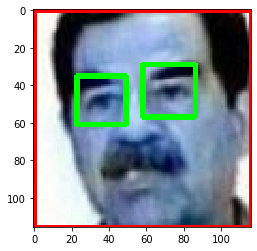

In [177]:
plt.imshow(roi_1[0])

# HAAR for remaining training images

In [186]:
training_df_500_1000 = training_df.iloc[500:1000, :]
training_df_500_1000.head()

,images,labels
500,Jean-David_Levitte - _0_5236.jpg,Jean
501,Paul_Bremer - _0_8097.jpg,Paul_Bremer
502,Ari_Fleischer - _0_6150.jpg,Ari_Fleischer
503,John_Negroponte - _0_5704.jpg,John_Negroponte
504,Mike_Weir - _0_1831.jpg,Mike_Weir


In [187]:
training_df_500_1000.shape

(500, 2)

In [0]:
training_df_500_1000 = training_df.iloc[500:1000, :]
training_df_500_1000 = training_df_500_1000.reset_index(drop = True)

images_500_1000 = []
labels_500_1000 = []
roi_500_1000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_500_1000)):
  img = cv2.imread(training_df_500_1000['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    eye = eye_cascade.detectMultiScale(roi_gray)
    #eyes.append(eye)
    for (ex, ey, ew, eh) in eye:
      cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    #print(len(eye))
    
    if len(eye)>1:
      roi_500_1000.append(roi_img)
      labels_500_1000.append(training_df_500_1000['labels'][i])
      images_500_1000.append(training_df_500_1000['images'][i])
    
    if len(images)%50 == 0:
      print(len(images))
      print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_500_1000'), roi_500_1000)
np.save(os.path.join(haar_path, 'labels_500_1000'), labels_500_1000)
np.save(os.path.join(haar_path, 'images_500_1000'), images_500_1000)



In [192]:
len(images_500_1000)

275

Text(0.5, 0, 'Jean')

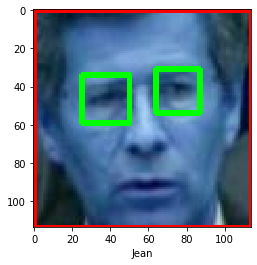

In [193]:
plt.imshow(roi_500_1000[0])
plt.xlabel(labels_500_1000[0])

In [0]:
training_df_1000_1500 = training_df.iloc[1000:1500, :]
training_df_1000_1500 = training_df_1000_1500.reset_index(drop = True)

images_1000_1500 = []
labels_1000_1500 = []
roi_1000_1500 = []
#eyes = []

start = time.time()

for i in range(len(training_df_1000_1500)):
  img = cv2.imread(training_df_1000_1500['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    eye = eye_cascade.detectMultiScale(roi_gray)
    #eyes.append(eye)
    for (ex, ey, ew, eh) in eye:
      cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    #print(len(eye))
    
    if len(eye)>1:
      roi_1000_1500.append(roi_img)
      labels_1000_1500.append(training_df_1000_1500['labels'][i])
      images_1000_1500.append(training_df_1000_1500['images'][i])
    
    if len(images)%50 == 0:
      print(len(images))
      print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_1000_1500'), roi_1000_1500)
np.save(os.path.join(haar_path, 'labels_1000_1500'), labels_1000_1500)
np.save(os.path.join(haar_path, 'images_1000_1500'), images_1000_1500)



In [195]:
len(images_1000_1500)

276

Text(0.5, 0, 'Rudolph_Giuliani ')

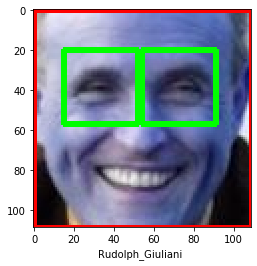

In [196]:
plt.imshow(roi_1000_1500[0])
plt.xlabel(labels_1000_1500[0])

In [0]:
training_df_1500_2000 = training_df.iloc[1500:2000, :]
training_df_1500_2000 = training_df_1500_2000.reset_index(drop = True)

images_1500_2000 = []
labels_1500_2000 = []
roi_1500_2000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_1500_2000)):
  img = cv2.imread(training_df_1500_2000['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    eye = eye_cascade.detectMultiScale(roi_gray)
    #eyes.append(eye)
    for (ex, ey, ew, eh) in eye:
      cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    #print(len(eye))
    
    if len(eye)>1:
      roi_1500_2000.append(roi_img)
      labels_1500_2000.append(training_df_1500_2000['labels'][i])
      images_1500_2000.append(training_df_1500_2000['images'][i])
    
    if len(images)%50 == 0:
      print(len(images))
      print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_1500_2000'), roi_1500_2000)
np.save(os.path.join(haar_path, 'labels_1500_2000'), labels_1500_2000)
np.save(os.path.join(haar_path, 'images_1500_2000'), images_1500_2000)



In [198]:
len(images_1500_2000)

276

Text(0.5, 0, 'Angelina_Jolie ')

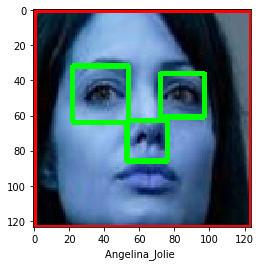

In [199]:
plt.imshow(roi_1500_2000[0])
plt.xlabel(labels_1500_2000[0])

In [0]:
training_df_2000_3000 = training_df.iloc[2000:3000, :]
training_df_2000_3000 = training_df_2000_3000.reset_index(drop = True)

images_2000_3000 = []
labels_2000_3000 = []
roi_2000_3000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_2000_3000)):
  img = cv2.imread(training_df_2000_3000['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    eye = eye_cascade.detectMultiScale(roi_gray)
    #eyes.append(eye)
    for (ex, ey, ew, eh) in eye:
      cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    #print(len(eye))
    
    if len(eye)>=1:
      roi_2000_3000.append(roi_img)
      labels_2000_3000.append(training_df_2000_3000['labels'][i])
      images_2000_3000.append(training_df_2000_3000['images'][i])
    
    if len(images)%50 == 0:
      print(len(images))
      print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_2000_3000'), roi_2000_3000)
np.save(os.path.join(haar_path, 'labels_2000_3000'), labels_2000_3000)
np.save(os.path.join(haar_path, 'images_2000_3000'), images_2000_3000)



In [201]:
len(roi_2000_3000)

695

Text(0.5, 0, 'Sergey_Lavrov ')

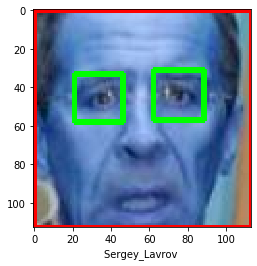

In [202]:
plt.imshow(roi_2000_3000[0])
plt.xlabel(labels_2000_3000[0])

In [0]:
training_df_3000_4000 = training_df.iloc[3000:4000, :]
training_df_3000_4000 = training_df_3000_4000.reset_index(drop = True)

images_3000_4000 = []
labels_3000_4000 = []
roi_3000_4000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_3000_4000)):
  img = cv2.imread(training_df_3000_4000['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    eye = eye_cascade.detectMultiScale(roi_gray)
    #eyes.append(eye)
    for (ex, ey, ew, eh) in eye:
      cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    #print(len(eye))
    
    if len(eye)>=1:
      roi_3000_4000.append(roi_img)
      labels_3000_4000.append(training_df_3000_4000['labels'][i])
      images_3000_4000.append(training_df_3000_4000['images'][i])
    
    if len(images)%50 == 0:
      print(len(images))
      print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_3000_4000'), roi_3000_4000)
np.save(os.path.join(haar_path, 'labels_3000_4000'), labels_3000_4000)
np.save(os.path.join(haar_path, 'images_3000_4000'), images_3000_4000)



In [205]:
len(roi_3000_4000)


695

In [208]:
df = pd.DataFrame(columns = ['images_3000_4000'])
df['images_3000_4000'] = images_3000_4000
df['images_3000_4000'].nunique()

689

In [209]:
df['images_3000_4000'].value_counts(dropna = False)

Nicanor_Duarte_Frutos - _0_621.jpg     2
Mohammad_Khatami - _0_979.jpg          2
Bill_Simon - _0_2054.jpg               2
Jackie_Chan - _0_6551.jpg              2
Sergey_Lavrov - _0_5336.jpg            2
                                      ..
Tony_Blair - _0_9833.jpg               1
John_Howard - _0_7669.jpg              1
Tom_Cruise - _0_4095.jpg               1
Naomi_Watts - _0_3580.jpg              1
Nicanor_Duarte_Frutos - _0_8021.jpg    1
Name: images_3000_4000, Length: 689, dtype: int64

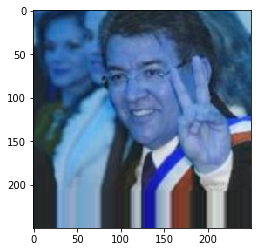

In [210]:
plt.imshow(cv2.imread('Nicanor_Duarte_Frutos - _0_621.jpg'))

In [211]:
images_3000_4000.index('Nicanor_Duarte_Frutos - _0_621.jpg')

473

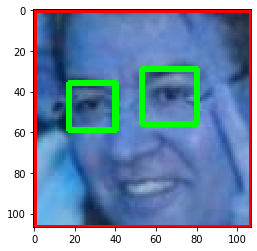

In [214]:
plt.imshow(roi_3000_4000[474])

In [215]:
images_3000_4000[474]

'Nicanor_Duarte_Frutos - _0_621.jpg'

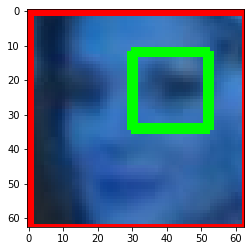

In [216]:
plt.imshow(roi_3000_4000[473])

In [0]:
training_df_4000_5000 = training_df.iloc[4000:5000, :]
training_df_4000_5000 = training_df_4000_5000.reset_index(drop = True)

images_4000_5000 = []
labels_4000_5000 = []
roi_4000_5000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_4000_5000)):
  img = cv2.imread(training_df_4000_5000['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    eye = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    #eyes.append(eye)
    for (ex, ey, ew, eh) in eye:
      cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    #print(len(eye))
    
    if len(eye)==2:
      roi_4000_5000.append(roi_img)
      labels_4000_5000.append(training_df_4000_5000['labels'][i])
      images_4000_5000.append(training_df_4000_5000['images'][i])
    
    if len(images)%50 == 0:
      print(len(images))
      print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_4000_5000'), roi_4000_5000)
np.save(os.path.join(haar_path, 'labels_4000_5000'), labels_4000_5000)
np.save(os.path.join(haar_path, 'images_4000_5000'), images_4000_5000)



In [221]:
len(roi_4000_5000)

258

In [222]:
training_df_5000_6000 = training_df.iloc[5000:6000, :]
training_df_5000_6000 = training_df_5000_6000.reset_index(drop = True)

images_5000_6000 = []
labels_5000_6000 = []
roi_5000_6000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_5000_6000)):
  img = cv2.imread(training_df_5000_6000['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    eye = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    #eyes.append(eye)
    for (ex, ey, ew, eh) in eye:
      cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    #print(len(eye))
    
    if len(eye)>=1:
      roi_5000_6000.append(roi_img)
      labels_5000_6000.append(training_df_5000_6000['labels'][i])
      images_5000_6000.append(training_df_5000_6000['images'][i])
    
    if len(images_5000_6000)%50 == 0:
      print(len(images_5000_6000))
      print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_5000_6000'), roi_5000_6000)
np.save(os.path.join(haar_path, 'labels_5000_6000'), labels_5000_6000)
np.save(os.path.join(haar_path, 'images_5000_6000'), images_5000_6000)



0
0.5485653877258301
0
0.7576892375946045
0
1.1550207138061523
50
24.633911848068237
100
45.34197664260864
150
63.911760568618774
150
64.12450194358826
200
88.6369240283966
250
111.73252010345459
300
138.1323218345642
350
162.6634407043457
350
163.1711881160736
400
187.50434756278992
450
207.8709864616394


In [223]:
len(roi_5000_6000)

451

In [0]:
training_df_6000_7000 = training_df.iloc[6000:7000, :]
training_df_6000_7000 = training_df_6000_7000.reset_index(drop = True)

images_6000_7000 = []
labels_6000_7000 = []
roi_6000_7000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_6000_7000)):
  try:
    img = cv2.imread(training_df_6000_7000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_gray = gray[y:y+h, x:x+w]
      eye = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
      #eyes.append(eye)
      for (ex, ey, ew, eh) in eye:
        cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
      #print(len(eye))
      
      if len(eye)>=1:
        roi_6000_7000.append(roi_img)
        labels_6000_7000.append(training_df_6000_7000['labels'][i])
        images_6000_7000.append(training_df_6000_7000['images'][i])
  except Exception as e:
    pass
    
    if len(images)%50 == 0:
      print(len(images))
      print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_6000_7000'), roi_6000_7000)
np.save(os.path.join(haar_path, 'labels_6000_7000'), labels_6000_7000)
np.save(os.path.join(haar_path, 'images_6000_7000'), images_6000_7000)



In [241]:
len(images_6000_7000)

462

In [0]:
training_df_7000_8000 = training_df.iloc[7000:8000, :]
training_df_7000_8000 = training_df_7000_8000.reset_index(drop = True)

images_7000_8000 = []
labels_7000_8000 = []
roi_7000_8000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_7000_8000)):
  try:
    img = cv2.imread(training_df_7000_8000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      #roi_gray = gray[y:y+h, x:x+w]
      #eye = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
      #eyes.append(eye)
      #for (ex, ey, ew, eh) in eye:
        #cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
      #print(len(eye))
      
      #if len(eye)>=1:
      roi_7000_8000.append(roi_img)
      labels_7000_8000.append(training_df_7000_8000['labels'][i])
      images_7000_8000.append(training_df_7000_8000['images'][i])
  except Exception as e:
    pass
    
    if len(images_7000_8000)%50 == 0:
      print(len(images))
      print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_7000_8000'), roi_7000_8000)
np.save(os.path.join(haar_path, 'labels_7000_8000'), labels_7000_8000)
np.save(os.path.join(haar_path, 'images_7000_8000'), images_7000_8000)



In [243]:
len(roi_7000_8000)

780

In [244]:
df = pd.DataFrame(columns = ['images_7000_8000'])
df['images_7000_8000'] = images_7000_8000
df['images_7000_8000'].value_counts(dropna = False)

Yoriko_Kawaguchi - _0_9198.jpg           2
Renee_Zellweger - _0_8120.jpg            2
Jean_Charest - _0_6884.jpg               2
Nicanor_Duarte_Frutos - _0_5795.jpg      2
Hugo_Chavez - _0_6473.jpg                2
                                        ..
Gloria_Macapagal_Arroyo - _0_8258.jpg    1
Adrien_Brody - _0_8417.jpg               1
Keanu_Reeves - _0_3816.jpg               1
John_Allen_Muhammad - _0_7466.jpg        1
Guillermo_Coria - _0_6253.jpg            1
Name: images_7000_8000, Length: 755, dtype: int64

In [245]:
training_df_8000_9000 = training_df.iloc[8000:9000, :]
training_df_8000_9000 = training_df_8000_9000.reset_index(drop = True)

images_8000_9000 = []
labels_8000_9000 = []
roi_8000_9000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_8000_9000)):
  try:
    img = cv2.imread(training_df_8000_9000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      #roi_gray = gray[y:y+h, x:x+w]
      #eye = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
      #eyes.append(eye)
      #for (ex, ey, ew, eh) in eye:
        #cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
      #print(len(eye))
      
      #if len(eye)>=1:
      roi_8000_9000.append(roi_img)
      labels_8000_9000.append(training_df_8000_9000['labels'][i])
      images_8000_9000.append(training_df_8000_9000['images'][i])
  except Exception as e:
    pass
    
  if len(images_8000_9000)%50 == 0:
    print(len(images))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_8000_9000'), roi_8000_9000)
np.save(os.path.join(haar_path, 'labels_8000_9000'), labels_8000_9000)
np.save(os.path.join(haar_path, 'images_8000_9000'), images_8000_9000)



346
12.775171518325806
346
12.967680215835571
346
25.157099723815918
346
25.337438106536865
346
36.63673949241638
346
36.82239580154419
346
51.67782807350159
346
64.30051922798157
346
76.72801494598389
346
91.94897794723511
346
104.87730884552002
346
105.04385805130005
346
105.25985383987427
346
118.51736688613892
346
130.25310349464417
346
142.41958928108215
346
168.2739179134369
346
179.15810775756836
346
194.2287528514862
346
194.38834238052368
346
206.7885913848877


In [246]:
len(images_8000_9000)

803

In [247]:
df = pd.DataFrame(columns = ['images_8000_9000'])
df['images_8000_9000'] = images_8000_9000
df['images_8000_9000'].value_counts(dropna = False)

Naomi_Watts - _0_4303.jpg           2
Paul_Bremer - _0_1185.jpg           2
Salma_Hayek - _0_2357.jpg           2
Hugo_Chavez - _0_4106.jpg           2
Alvaro_Uribe - _0_705.jpg           2
                                   ..
Tiger_Woods - _0_1129.jpg           1
Hugo_Chavez - _0_199.jpg            1
Sergey_Lavrov - _0_7982.jpg         1
Sergey_Lavrov - _0_4091.jpg         1
Queen_Elizabeth_II - _0_3908.jpg    1
Name: images_8000_9000, Length: 784, dtype: int64

In [248]:
training_df_9000_10000 = training_df.iloc[9000:10000, :]
training_df_9000_10000 = training_df_9000_10000.reset_index(drop = True)

images_9000_10000 = []
labels_9000_10000 = []
roi_9000_10000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_9000_10000)):
  try:
    img = cv2.imread(training_df_9000_10000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_9000_10000.append(roi_img)
      labels_9000_10000.append(training_df_9000_10000['labels'][i])
      images_9000_10000.append(training_df_9000_10000['images'][i])
  except Exception as e:
    pass
    
  if len(images_9000_10000)%50 == 0:
    print(len(images_9000_10000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_9000_10000'), roi_9000_10000)
np.save(os.path.join(haar_path, 'labels_9000_10000'), labels_9000_10000)
np.save(os.path.join(haar_path, 'images_9000_10000'), images_9000_10000)

df = pd.DataFrame(columns = ['images_9000_10000'])
df['images_9000_10000'] = images_9000_10000
print(df['images_9000_10000'].value_counts(dropna = False))
print(len(df))

50
13.55312967300415
100
25.927525997161865
150
37.91437888145447
200
50.64250445365906
250
64.16436219215393
300
77.21955561637878
350
89.65416884422302
400
103.51764678955078
450
117.55885696411133
450
117.96308755874634
500
132.00201869010925
500
132.1859757900238
500
132.54130744934082
500
132.75965452194214
550
146.67935729026794
550
146.8320026397705
600
158.7646734714508
650
172.95485734939575
700
186.53131532669067
750
199.18291354179382
772


In [249]:
len(df)

772

In [250]:
df['images_9000_10000'].value_counts(dropna = False)

Hugo_Chavez - _0_2815.jpg              2
Naomi_Watts - _0_6199.jpg              2
Joschka_Fischer - _0_5788.jpg          2
Nicanor_Duarte_Frutos - _0_9622.jpg    2
Sergey_Lavrov - _0_6442.jpg            2
                                      ..
Meryl_Streep - _0_2855.jpg             1
George_Robertson - _0_6934.jpg         1
Gordon_Brown - _0_2762.jpg             1
Julie_Gerberding - _0_9831.jpg         1
Gray_Davis - _0_9516.jpg               1
Name: images_9000_10000, Length: 756, dtype: int64

In [251]:
print(df['images_9000_10000'].value_counts(dropna = False))
print(len(df))

Hugo_Chavez - _0_2815.jpg              2
Naomi_Watts - _0_6199.jpg              2
Joschka_Fischer - _0_5788.jpg          2
Nicanor_Duarte_Frutos - _0_9622.jpg    2
Sergey_Lavrov - _0_6442.jpg            2
                                      ..
Meryl_Streep - _0_2855.jpg             1
George_Robertson - _0_6934.jpg         1
Gordon_Brown - _0_2762.jpg             1
Julie_Gerberding - _0_9831.jpg         1
Gray_Davis - _0_9516.jpg               1
Name: images_9000_10000, Length: 756, dtype: int64
772


In [252]:
training_df_10000_12000 = training_df.iloc[10000:12000, :]
training_df_10000_12000 = training_df_10000_12000.reset_index(drop = True)

images_10000_12000 = []
labels_10000_12000 = []
roi_10000_12000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_10000_12000)):
  try:
    img = cv2.imread(training_df_10000_12000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_10000_12000.append(roi_img)
      labels_10000_12000.append(training_df_10000_12000['labels'][i])
      images_10000_12000.append(training_df_10000_12000['images'][i])
  except Exception as e:
    pass
    
  if len(images_10000_12000)%500 == 0:
    print(len(images_10000_12000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_10000_12000'), roi_10000_12000)
np.save(os.path.join(haar_path, 'labels_10000_12000'), labels_10000_12000)
np.save(os.path.join(haar_path, 'images_10000_12000'), images_10000_12000)

df = pd.DataFrame(columns = ['images_10000_12000'])
df['images_10000_12000'] = images_10000_12000
print(df['images_10000_12000'].value_counts(dropna = False))
print(len(df))

500
127.77911496162415
500
127.93692803382874
1000
259.7709023952484
1500
393.20181798934937
1500
393.40992760658264
Mohammed_Al-Douri - _0_8965.jpg       3
Mohammed_Al-Douri - _0_6294.jpg       3
Recep_Tayyip_Erdogan - _0_1030.jpg    3
Alvaro_Uribe - _0_2282.jpg            2
Charles_Moose - _0_6187.jpg           2
                                     ..
Jean_Chretien - _0_8590.jpg           1
Taha_Yassin_Ramadan - _0_1289.jpg     1
Lindsay_Davenport - _0_672.jpg        1
Lucio_Gutierrez - _0_9760.jpg         1
Michael_Jackson - _0_9622.jpg         1
Name: images_10000_12000, Length: 1551, dtype: int64
1598


In [253]:
training_df_12000_14000 = training_df.iloc[12000:14000, :]
training_df_12000_14000 = training_df_12000_14000.reset_index(drop = True)

images_12000_14000 = []
labels_12000_14000 = []
roi_12000_14000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_12000_14000)):
  try:
    img = cv2.imread(training_df_12000_14000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_12000_14000.append(roi_img)
      labels_12000_14000.append(training_df_12000_14000['labels'][i])
      images_12000_14000.append(training_df_12000_14000['images'][i])
  except Exception as e:
    pass
    
  if len(images_12000_14000)%500 == 0:
    print(len(images_12000_14000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_12000_14000'), roi_12000_14000)
np.save(os.path.join(haar_path, 'labels_12000_14000'), labels_12000_14000)
np.save(os.path.join(haar_path, 'images_12000_14000'), images_12000_14000)

df = pd.DataFrame(columns = ['images_12000_14000'])
df['images_12000_14000'] = images_12000_14000
print(df['images_12000_14000'].value_counts(dropna = False))
print(len(df))

500
130.37928676605225
1000
264.3762638568878
1000
264.53980135917664
1500
406.4323856830597
1500
406.69317293167114
Mohammed_Al-Douri - _0_5632.jpg      3
Bill_Clinton - _0_666.jpg            2
Richard_Myers - _0_5164.jpg          2
Joschka_Fischer - _0_2779.jpg        2
Vaclav_Havel - _0_7615.jpg           2
                                    ..
Richard_Gere - _0_2968.jpg           1
Hans_Blix - _0_6164.jpg              1
Michael_Jackson - _0_4171.jpg        1
Pete_Sampras - _0_4255.jpg           1
John_Allen_Muhammad - _0_2953.jpg    1
Name: images_12000_14000, Length: 1532, dtype: int64
1576


In [254]:
training_df_14000_17000 = training_df.iloc[14000:17000, :]
training_df_14000_17000 = training_df_14000_17000.reset_index(drop = True)

images_14000_17000 = []
labels_14000_17000 = []
roi_14000_17000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_14000_17000)):
  try:
    img = cv2.imread(training_df_14000_17000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_14000_17000.append(roi_img)
      labels_14000_17000.append(training_df_14000_17000['labels'][i])
      images_14000_17000.append(training_df_14000_17000['images'][i])
  except Exception as e:
    pass
    
  if len(images_14000_17000)%500 == 0:
    print(len(images_14000_17000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_14000_17000'), roi_14000_17000)
np.save(os.path.join(haar_path, 'labels_14000_17000'), labels_14000_17000)
np.save(os.path.join(haar_path, 'images_14000_17000'), images_14000_17000)

df = pd.DataFrame(columns = ['images_14000_17000'])
df['images_14000_17000'] = images_14000_17000
print(df['images_14000_17000'].value_counts(dropna = False))
print(len(df))

500
135.35959649085999
1000
267.07069516181946
1000
267.26338362693787
1500
399.5791232585907
2000
542.0586624145508
Mohammed_Al-Douri - _0_5465.jpg            3
Gray_Davis - _0_1450.jpg                   3
Luiz_Inacio_Lula_da_Silva - _0_4183.jpg    2
Paul_Burrell - _0_5545.jpg                 2
Jose_Maria_Aznar - _0_749.jpg              2
                                          ..
Jennifer_Aniston - _0_2227.jpg             1
Serena_Williams - _0_967.jpg               1
Kim_Clijsters - _0_1516.jpg                1
Jean_Charest - _0_9564.jpg                 1
Junichiro_Koizumi - _0_5536.jpg            1
Name: images_14000_17000, Length: 2257, dtype: int64
2315


In [255]:
training_df_17000_20000 = training_df.iloc[17000:20000, :]
training_df_17000_20000 = training_df_17000_20000.reset_index(drop = True)

images_17000_20000 = []
labels_17000_20000 = []
roi_17000_20000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_17000_20000)):
  try:
    img = cv2.imread(training_df_17000_20000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_17000_20000.append(roi_img)
      labels_17000_20000.append(training_df_17000_20000['labels'][i])
      images_17000_20000.append(training_df_17000_20000['images'][i])
  except Exception as e:
    pass
    
  if len(images_17000_20000)%500 == 0:
    print(len(images_17000_20000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_17000_20000'), roi_17000_20000)
np.save(os.path.join(haar_path, 'labels_17000_20000'), labels_17000_20000)
np.save(os.path.join(haar_path, 'images_17000_20000'), images_17000_20000)

df = pd.DataFrame(columns = ['images_17000_20000'])
df['images_17000_20000'] = images_17000_20000
print(df['images_17000_20000'].value_counts(dropna = False))
print(len(df))

500
133.53363180160522
1000
265.7367777824402
1500
406.5939531326294
1500
406.85334730148315
2000
537.1647851467133
Gray_Davis - _0_9719.jpg            3
Mohammed_Al-Douri - _0_9902.jpg     3
Mohammad_Khatami - _0_6957.jpg      3
Mohammad_Khatami - _0_8765.jpg      2
Walter_Mondale - _0_9634.jpg        2
                                   ..
Bill_Clinton - _0_2924.jpg          1
John_Paul_II - _0_4697.jpg          1
Gerhard_Schroeder - _0_9457.jpg     1
John_Ashcroft - _0_359.jpg          1
John_Allen_Muhammad - _0_586.jpg    1
Name: images_17000_20000, Length: 2287, dtype: int64
2362


In [256]:
training_df_20000_24000 = training_df.iloc[20000:24000, :]
training_df_20000_24000 = training_df_20000_24000.reset_index(drop = True)

images_20000_24000 = []
labels_20000_24000 = []
roi_20000_24000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_20000_24000)):
  try:
    img = cv2.imread(training_df_20000_24000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_20000_24000.append(roi_img)
      labels_20000_24000.append(training_df_20000_24000['labels'][i])
      images_20000_24000.append(training_df_20000_24000['images'][i])
  except Exception as e:
    pass
    
  if len(images_20000_24000)%400 == 0:
    print(len(images_20000_24000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_20000_24000'), roi_20000_24000)
np.save(os.path.join(haar_path, 'labels_20000_24000'), labels_20000_24000)
np.save(os.path.join(haar_path, 'images_20000_24000'), images_20000_24000)

df = pd.DataFrame(columns = ['images_20000_24000'])
df['images_20000_24000'] = images_20000_24000
print(df['images_20000_24000'].value_counts(dropna = False))
print(len(df))

400
108.6422667503357
800
220.4424910545349
1200
328.6915969848633
1200
329.03084206581116
1600
434.3919982910156
1600
434.5824365615845
2000
537.9020023345947
2400
653.4042809009552
2400
653.5684642791748
2800
755.0471813678741
Mohammed_Al-Douri - _0_9678.jpg      3
Mohammad_Khatami - _0_5659.jpg       3
Gray_Davis - _0_5557.jpg             3
Jennifer_Garner - _0_1855.jpg        2
Jimmy_Carter - _0_2539.jpg           2
                                    ..
Andy_Roddick - _0_2431.jpg           1
Paradorn_Srichaphan - _0_8054.jpg    1
Ann_Veneman - _0_751.jpg             1
Mohammed_Al-Douri - _0_46.jpg        1
Julie_Gerberding - _0_6230.jpg       1
Name: images_20000_24000, Length: 3049, dtype: int64
3133


In [257]:
training_df_24000_28000 = training_df.iloc[24000:28000, :]
training_df_24000_28000 = training_df_24000_28000.reset_index(drop = True)

images_24000_28000 = []
labels_24000_28000 = []
roi_24000_28000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_24000_28000)):
  try:
    img = cv2.imread(training_df_24000_28000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_24000_28000.append(roi_img)
      labels_24000_28000.append(training_df_24000_28000['labels'][i])
      images_24000_28000.append(training_df_24000_28000['images'][i])
  except Exception as e:
    pass
    
  if len(images_24000_28000)%500 == 0:
    print(len(images_24000_28000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_24000_28000'), roi_24000_28000)
np.save(os.path.join(haar_path, 'labels_24000_28000'), labels_24000_28000)
np.save(os.path.join(haar_path, 'images_24000_28000'), images_24000_28000)

df = pd.DataFrame(columns = ['images_24000_28000'])
df['images_24000_28000'] = images_24000_28000
print(df['images_24000_28000'].value_counts(dropna = False))
print(len(df))

500
118.7559928894043
1000
236.97921514511108
1500
352.8534586429596
1500
353.04751658439636
1500
353.2183063030243
2000
474.30894684791565
2000
474.52447724342346
2500
591.624579668045
2500
591.8189845085144
3000
711.5803635120392
3500
831.5878758430481
Gray_Davis - _0_7748.jpg                   3
Gonzalo_Sanchez_de_Lozada - _0_4336.jpg    3
Hans_Blix - _0_558.jpg                     3
Dominique_de_Villepin - _0_4849.jpg        3
Richard_Gere - _0_8522.jpg                 3
                                          ..
Rubens_Barrichello - _0_1129.jpg           1
Bill_Simon - _0_2222.jpg                   1
James_Kelly - _0_4268.jpg                  1
Eduardo_Duhalde - _0_5649.jpg              1
Lleyton_Hewitt - _0_8755.jpg               1
Name: images_24000_28000, Length: 3435, dtype: int64
3864


In [258]:
training_df_28000_33000 = training_df.iloc[28000:33000, :]
training_df_28000_33000 = training_df_28000_33000.reset_index(drop = True)

images_28000_33000 = []
labels_28000_33000 = []
roi_28000_33000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_28000_33000)):
  try:
    img = cv2.imread(training_df_28000_33000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_28000_33000.append(roi_img)
      labels_28000_33000.append(training_df_28000_33000['labels'][i])
      images_28000_33000.append(training_df_28000_33000['images'][i])
  except Exception as e:
    pass
    
  if len(images_28000_33000)%500 == 0:
    print(len(images_28000_33000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_28000_33000'), roi_28000_33000)
np.save(os.path.join(haar_path, 'labels_28000_33000'), labels_28000_33000)
np.save(os.path.join(haar_path, 'images_28000_33000'), images_28000_33000)

df = pd.DataFrame(columns = ['images_28000_33000'])
df['images_28000_33000'] = images_28000_33000
print(df['images_28000_33000'].value_counts(dropna = False))
print(len(df))

500
115.95875930786133
1000
234.72532677650452
1500
352.3847725391388
2000
464.519118309021
2500
588.6580753326416
3000
713.8160154819489
3500
824.5538113117218
4000
934.3355581760406
4500
1045.3007142543793
Gray_Davis - _0_2476.jpg               4
Atal_Bihari_Vajpayee - _0_8353.jpg     4
Mohammed_Al-Douri - _0_3425.jpg        4
Nicanor_Duarte_Frutos - _0_8043.jpg    4
Atal_Bihari_Vajpayee - _0_9998.jpg     4
                                      ..
Paul_Bremer - _0_9470.jpg              1
Charles_Taylor - _0_8862.jpg           1
James_Blake - _0_9915.jpg              1
Mark_Philippoussis - _0_4633.jpg       1
Tommy_Thompson - _0_2305.jpg           1
Name: images_28000_33000, Length: 4360, dtype: int64
4933


In [259]:
training_df_33000_38000 = training_df.iloc[33000:38000, :]
training_df_33000_38000 = training_df_33000_38000.reset_index(drop = True)

images_33000_38000 = []
labels_33000_38000 = []
roi_33000_38000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_33000_38000)):
  try:
    img = cv2.imread(training_df_33000_38000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_33000_38000.append(roi_img)
      labels_33000_38000.append(training_df_33000_38000['labels'][i])
      images_33000_38000.append(training_df_33000_38000['images'][i])
  except Exception as e:
    pass
    
  if len(images_33000_38000)%500 == 0:
    print(len(images_33000_38000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_33000_38000'), roi_33000_38000)
np.save(os.path.join(haar_path, 'labels_33000_38000'), labels_33000_38000)
np.save(os.path.join(haar_path, 'images_33000_38000'), images_33000_38000)

df = pd.DataFrame(columns = ['images_33000_38000'])
df['images_33000_38000'] = images_33000_38000
print(df['images_33000_38000'].value_counts(dropna = False))
print(len(df))

500
118.12734842300415
1000
238.3846995830536
1500
352.2535226345062
2000
469.297039270401
2500
592.58287358284
3000
704.5353891849518
3500
824.9498744010925
4500
1068.5197777748108
Jiang_Zemin - _0_9212.jpg          5
Javier_Solana - _0_1782.jpg        4
Lance_Armstrong - _0_926.jpg       4
Mohammed_Al-Douri - _0_1125.jpg    4
Lance_Armstrong - _0_9269.jpg      4
                                  ..
John_Kerry - _0_7655.jpg           1
Fidel_Castro - _0_5983.jpg         1
Jennifer_Aniston - _0_7101.jpg     1
Kim_Ryong-sung - _0_9128.jpg       1
Ricardo_Lagos - _0_712.jpg         1
Name: images_33000_38000, Length: 4348, dtype: int64
4927


In [260]:
training_df_38000_rest = training_df.iloc[38000:, :]
training_df_38000_rest = training_df_38000_rest.reset_index(drop = True)

images_38000_rest = []
labels_38000_rest = []
roi_38000_rest = []
#eyes = []

start = time.time()

for i in range(len(training_df_38000_rest)):
  try:
    img = cv2.imread(training_df_38000_rest['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_38000_rest.append(roi_img)
      labels_38000_rest.append(training_df_38000_rest['labels'][i])
      images_38000_rest.append(training_df_38000_rest['images'][i])
  except Exception as e:
    pass
    
  if len(images_38000_rest)%500 == 0:
    print(len(images_38000_rest))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_38000_rest'), roi_38000_rest)
np.save(os.path.join(haar_path, 'labels_38000_rest'), labels_38000_rest)
np.save(os.path.join(haar_path, 'images_38000_rest'), images_38000_rest)

df = pd.DataFrame(columns = ['images_38000_rest'])
df['images_38000_rest'] = images_38000_rest
print(df['images_38000_rest'].value_counts(dropna = False))
print(len(df))

500
117.61625242233276
1000
237.11924982070923
1500
354.5530960559845
2500
600.5136187076569
3000
715.9336409568787
Gonzalo_Sanchez_de_Lozada - _0_6373.jpg    4
Keanu_Reeves - _0_7168.jpg                 4
Mohammad_Khatami - _0_408.jpg              3
Amelie_Mauresmo - _0_4501.jpg              3
Pervez_Musharraf - _0_8786.jpg             3
                                          ..
Lleyton_Hewitt - _0_1041.jpg               1
Renee_Zellweger - _0_4475.jpg              1
Julie_Gerberding - _0_4033.jpg             1
David_Beckham - _0_6132.jpg                1
Paul_Bremer - _0_5607.jpg                  1
Name: images_38000_rest, Length: 3917, dtype: int64
4467


In [0]:
os.listdir(haar_path)

# Redoing for images 0 to 7000

Eralier these eye detection was performed on these images as well.

In [0]:
os.remove(os.path.join(haar_path, 'images_0_500.npy'))

In [0]:
os.remove(os.path.join(haar_path, 'labels_0_500.npy'))
os.remove(os.path.join(haar_path, 'roi_0_500.npy'))
os.remove(os.path.join(haar_path, 'roi_500_1000.npy'))
os.remove(os.path.join(haar_path, 'labels_500_1000.npy'))
os.remove(os.path.join(haar_path, 'images_500_1000.npy'))
os.remove(os.path.join(haar_path, 'roi_1000_1500.npy'))
os.remove(os.path.join(haar_path, 'labels_1000_1500.npy'))
os.remove(os.path.join(haar_path, 'images_1000_1500.npy'))
os.remove(os.path.join(haar_path, 'roi_1500_2000.npy'))
os.remove(os.path.join(haar_path, 'labels_1500_2000.npy'))
os.remove(os.path.join(haar_path, 'images_1500_2000.npy'))
os.remove(os.path.join(haar_path, 'roi_2000_3000.npy'))
os.remove(os.path.join(haar_path, 'labels_2000_3000.npy'))
os.remove(os.path.join(haar_path, 'images_2000_3000.npy'))
os.remove(os.path.join(haar_path, 'roi_3000_4000.npy'))
os.remove(os.path.join(haar_path, 'labels_3000_4000.npy'))
os.remove(os.path.join(haar_path, 'images_3000_4000.npy'))
os.remove(os.path.join(haar_path, 'roi_4000_5000.npy'))
os.remove(os.path.join(haar_path, 'labels_4000_5000.npy'))
os.remove(os.path.join(haar_path, 'images_4000_5000.npy'))
os.remove(os.path.join(haar_path, 'roi_5000_6000.npy'))
os.remove(os.path.join(haar_path, 'labels_5000_6000.npy'))
os.remove(os.path.join(haar_path, 'images_5000_6000.npy'))
os.remove(os.path.join(haar_path, 'roi_6000_7000.npy'))
os.remove(os.path.join(haar_path, 'labels_6000_7000.npy'))
os.remove(os.path.join(haar_path, 'images_6000_7000.npy'))

In [266]:
training_df_0_7000 = training_df.iloc[0:7000, :]
training_df_0_7000 = training_df_0_7000.reset_index(drop = True)

images_0_7000 = []
labels_0_7000 = []
roi_0_7000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_0_7000)):
  try:
    img = cv2.imread(training_df_0_7000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_0_7000.append(roi_img)
      labels_0_7000.append(training_df_0_7000['labels'][i])
      images_0_7000.append(training_df_0_7000['images'][i])
  except Exception as e:
    pass
    
  if len(images_0_7000)%500 == 0:
    print(len(images_0_7000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_0_7000'), roi_0_7000)
np.save(os.path.join(haar_path, 'labels_0_7000'), labels_0_7000)
np.save(os.path.join(haar_path, 'images_0_7000'), images_0_7000)

df = pd.DataFrame(columns = ['images_0_7000'])
df['images_0_7000'] = images_0_7000
print(df['images_0_7000'].value_counts(dropna = False))
print(len(df))

500
25.32461977005005
1000
50.799325942993164
2000
101.70904302597046
2500
126.71575570106506
3000
152.50280785560608
3500
178.30037307739258
4000
203.88531875610352
5500
281.5466206073761
6000
307.5987226963043
6500
334.1938714981079
6500
334.2454283237457
Mohammed_Al-Douri - _0_4565.jpg          4
Atal_Bihari_Vajpayee - _0_3189.jpg       4
Gray_Davis - _0_7678.jpg                 4
Lance_Armstrong - _0_7969.jpg            4
Hans_Blix - _0_5089.jpg                  3
                                        ..
Gloria_Macapagal_Arroyo - _0_2427.jpg    1
Ari_Fleischer - _0_5301.jpg              1
Tiger_Woods - _0_4273.jpg                1
Atal_Bihari_Vajpayee - _0_9339.jpg       1
Michael_Schumacher - _0_7891.jpg         1
Name: images_0_7000, Length: 6056, dtype: int64
6867


# Redoing for images 7000 to 24000

**This is done since the other images were processed without additional constraints in the detectMultiScale() function.**

In [0]:
os.remove(os.path.join(haar_path, 'images_7000_8000.npy'))
os.remove(os.path.join(haar_path, 'labels_7000_8000.npy'))
os.remove(os.path.join(haar_path, 'roi_7000_8000.npy'))
os.remove(os.path.join(haar_path, 'roi_8000_9000.npy'))
os.remove(os.path.join(haar_path, 'labels_8000_9000.npy'))
os.remove(os.path.join(haar_path, 'images_8000_9000.npy'))
os.remove(os.path.join(haar_path, 'roi_9000_10000.npy'))
os.remove(os.path.join(haar_path, 'labels_9000_10000.npy'))
os.remove(os.path.join(haar_path, 'images_9000_10000.npy'))
os.remove(os.path.join(haar_path, 'roi_10000_12000.npy'))
os.remove(os.path.join(haar_path, 'labels_10000_12000.npy'))
os.remove(os.path.join(haar_path, 'images_10000_12000.npy'))
os.remove(os.path.join(haar_path, 'roi_12000_14000.npy'))
os.remove(os.path.join(haar_path, 'labels_12000_14000.npy'))
os.remove(os.path.join(haar_path, 'images_12000_14000.npy'))
os.remove(os.path.join(haar_path, 'roi_14000_17000.npy'))
os.remove(os.path.join(haar_path, 'labels_14000_17000.npy'))
os.remove(os.path.join(haar_path, 'images_14000_17000.npy'))
os.remove(os.path.join(haar_path, 'roi_17000_20000.npy'))
os.remove(os.path.join(haar_path, 'labels_17000_20000.npy'))
os.remove(os.path.join(haar_path, 'images_17000_20000.npy'))
os.remove(os.path.join(haar_path, 'roi_20000_24000.npy'))
os.remove(os.path.join(haar_path, 'labels_20000_24000.npy'))
os.remove(os.path.join(haar_path, 'images_20000_24000.npy'))


In [268]:
training_df_7000_24000 = training_df.iloc[7000:24000, :]
training_df_7000_24000 = training_df_7000_24000.reset_index(drop = True)

images_7000_24000 = []
labels_7000_24000 = []
roi_7000_24000 = []
#eyes = []

start = time.time()

for i in range(len(training_df_7000_24000)):
  try:
    img = cv2.imread(training_df_7000_24000['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in face:
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      roi_img = img[y:y+h, x:x+w]
      roi_7000_24000.append(roi_img)
      labels_7000_24000.append(training_df_7000_24000['labels'][i])
      images_7000_24000.append(training_df_7000_24000['images'][i])
  except Exception as e:
    pass
    
  if len(images_7000_24000)%500 == 0:
    print(len(images_7000_24000))
    print(time.time() - start)

np.save(os.path.join(haar_path, 'roi_7000_24000'), roi_7000_24000)
np.save(os.path.join(haar_path, 'labels_7000_24000'), labels_7000_24000)
np.save(os.path.join(haar_path, 'images_7000_24000'), images_7000_24000)

df = pd.DataFrame(columns = ['images_7000_24000'])
df['images_7000_24000'] = images_7000_24000
print(df['images_7000_24000'].value_counts(dropna = False))
print(len(df))

500
27.61697268486023
1500
78.73634552955627
2000
103.65927934646606
2500
128.9125621318817
3000
155.15952444076538
3500
181.05273008346558
4000
206.4622733592987
4000
206.5053780078888
4500
231.66470980644226
5000
256.82648038864136
5000
256.8765711784363
6000
307.18585562705994
6500
333.3709714412689
7000
358.5266842842102
7500
383.73083424568176
7500
383.77829480171204
8000
409.4560811519623
8500
434.87857460975647
9000
461.433109998703
9500
487.4177532196045
10000
513.9522910118103
10500
539.7920525074005
11500
589.5200042724609
12000
615.1199424266815
12500
641.1328687667847
13000
666.7760074138641
13500
692.8879518508911
14000
719.3123464584351
14000
719.3607733249664
14500
744.8241009712219
15000
770.2454209327698
15000
770.3016409873962
16000
822.0631532669067
16500
847.2747144699097
Mahathir_Mohamad - _0_3898.jpg        4
Keanu_Reeves - _0_9980.jpg            4
Keanu_Reeves - _0_6323.jpg            4
Mohammad_Khatami - _0_6957.jpg        4
Atal_Bihari_Vajpayee - _0_4714.jpg   